Advanced Statistics for Physics Analysis 2022-23

Antonio Feltrin, Student ID 2097126

antonio.feltrin@studenti.unipd.it

# Lab 04: Bayesian Inference - II

Poisson inference and hypothesis tests

# Ex. 1: Insurance companies

The number of claims received by an insurance company during a week follows a Poisson distribution with unknown mean $\mu$


The number of claims, per week, observed over a ten week period are: 
   * 5, 8, 4, 6, 11, 6, 6, 5, 6, 4

In [1]:
library(scales)

### 1.1
Suppose to use a prior uniform distribution for $\mu$ 
   * Find the posterior distribution for μ and compute the posterior mean, median and variance
   * b plot the posterior distribution and the $95\%$ credibility interval



Given a uniform prior, the posterior distribution is the Gamma function, which is the conjugate function of the Poisson pdf.

Likelihood for a single Poisson process measurement $y$, given a parameter $\mu$:

$$ f(y|\mu) = \frac{\mu^y e^{-\mu}}{y!} $$

Posterior: Gamma distribution with $\alpha = \Sigma_i y_i$ and $\lambda = n$

$$ \Gamma(y|\alpha,\lambda) = k y^{\alpha-1} e^{-\lambda y} $$

In [2]:
#Some functions for plotting
myplot <- function(x1,y1,winw=8,winh=6,title='Prior',xlab='p',ylab='pdf',mycol='orange',ltype =1, lwdt=1,type='l', fillit=TRUE,xrange=c(min(x1),max(x1))){
       options(repr.plot.width=winw, repr.plot.height=winh)
       plot(x1,y1,
       col = mycol,
       main = title,
       xlab = xlab,
       type = type,
       xlim = xrange,
       lty = ltype,
       lwd = lwdt,
       ylab = ylab,
       )
       grid()
       if(fillit){
              polygon(x = c(min(x1),x1,max(x1)),
              y = c(0,y1,0),
              col=alpha('#9daed1',0.4))
              }
}

mylines <- function(x1,y1,title='Posterior',xlab='p', ylab='pdf',mycol='orange',lwdt=1,ltype=1){
       lines(x1,y1,
       col = mycol,
       lwd=lwdt,
       lty = ltype,
       xlab = xlab,
       ylab = ylab
       )
}

mypoly <- function(pdf,qleft=min(x1),qright=max(x1),mycol='#9daed1'){    
       x1.95 <- seq(qleft, qright, by=1/N1)
       y1.95 <- c(0,pdf(x1.95),0)
       polygon(x = c(qleft,x1.95,qright),
       y = y1.95,
       col=alpha(mycol,0.3))
}

mytext <- function(posx,posy=5,ltype=2,lwdt=1,mycol='black',epsilon=0,vert=TRUE){ #annotate quantiles
    for(xi in posx){
       if (vert == TRUE)  {
              abline(v=xi,lty=ltype,lwd=lwdt,col=mycol)
              text(x=xi-epsilon,y=posy,srt=90,label=round(xi,3))
       }
       else {
              abline(h=posy,lty=ltype,lwd=lwdt,col=mycol)
              text(x=xi-epsilon,y=posy,label=round(posy,3))  
       }
    }
}

In [3]:
#Uniform Prior (already normalized)
N1 <- 501
counts1 <- 10
p1 <- seq(0,counts1,by=1)
mu1 <- seq(0,counts1,length.out=N1)

claims <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)

u.prior <- dunif(p1,0,counts1) # rep(1,counts1+1) #
u.liklh <- dpois(p1,4)

u.alpha.post <- sum(claims)
u.lambda.post <- length(claims)

#gamma (alpha = shape, beta=lambda =rate= 1/scale=1/theta)
u.post <- function(mu) {dgamma(mu,shape=u.alpha.post,rate=u.lambda.post)}

In [4]:
u.mean <- u.alpha.post/u.lambda.post
u.variance <- u.alpha.post/(u.lambda.post^2)
u.median <- qgamma(0.5,u.alpha.post,u.lambda.post)


#shape = a, scale = s
#E(X) = a*s and Var(x) = a*s**2
cat('I found a posterior with alpha =',u.alpha.post,'and lambda =',u.lambda.post,'\n')
cat('I found a posterior with mean =',u.mean,'variance =',u.variance,'and median =',u.median,'\n')

I found a posterior with alpha = 61 and lambda = 10 
I found a posterior with mean = 6.1 variance = 0.61 and median = 6.066699 


left bound = 4.666017 right bound = 7.723189 


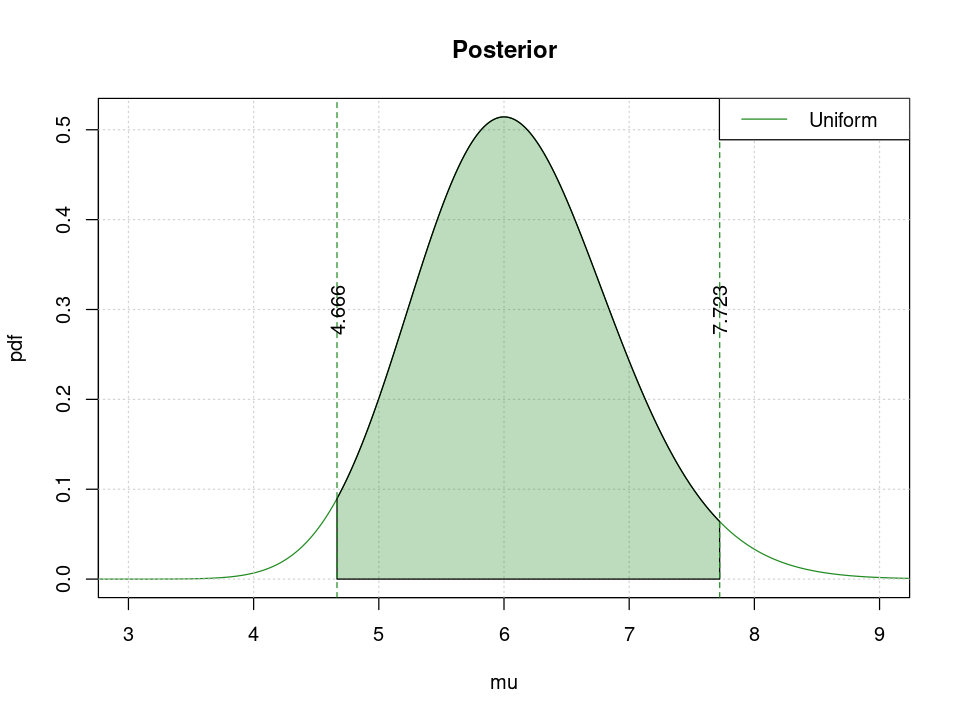

In [5]:
#Uniform prior plots

#myplot(p1,u.liklh,mycol='navy')
#mylines(p1,u.prior)
#legend('topright', c('Prior','Likelihood'), col=c('black','navy'), lty=1, bty ='o')

q = 0.025
ucol = 'forestgreen'
u.left = qgamma(q,u.alpha.post,u.lambda.post)
u.right = qgamma(1-q,u.alpha.post,u.lambda.post)
cat('left bound =',u.left,'right bound =',u.right,'\n')

myplot(mu1,u.post(mu1),fillit = FALSE,title = 'Posterior',mycol=ucol,xrange=c(3,9),xlab = 'mu')
mypoly(u.post,u.left,u.right,mycol=ucol)
mytext(c(u.left,u.right),posy=0.3,mycol=ucol)
legend('topright', c('Uniform'), col=ucol, lty=1, bty ='o')

### 1.2

Suppose to use a Jeffreys’ prior for $\mu$: $g(\mu) \propto 1/\sqrt{\mu}$
* find the posterior distribution for $\mu$ and compute the posterior mean, median and variance
* plot the posterior distribution and the $95\%$ credibility interval

The posterior is the Gamma distribution $\Gamma(\mu)

In [6]:
#Jeffrey's Prior 
j.alpha.post <- sum(claims) + 1/2
j.lambda.post <- length(claims)

#gamma (alpha = shape, beta=lambda =rate= 1/scale=1/theta)
j.post <- function(mu){dgamma(mu,shape=j.alpha.post,rate=j.lambda.post)}

j.mean <- j.alpha.post/j.lambda.post
j.variance <- j.alpha.post/(j.lambda.post^2)
j.median <- qgamma(0.5,j.alpha.post,j.lambda.post)


cat('I found a posterior with alpha =',j.alpha.post,'and lambda =',j.lambda.post,'\n')
cat('I found a posterior with mean =',j.mean,'variance =',j.variance,'and median =',j.median,'\n')


j.left = qgamma(q,j.alpha.post,j.lambda.post)
j.right = qgamma(1-q,j.alpha.post,j.lambda.post)
cat('left bound =',j.left,'right bound =',j.right,'\n')

I found a posterior with alpha = 61.5 and lambda = 10 
I found a posterior with mean = 6.15 variance = 0.615 and median = 6.116699 
left bound = 4.709748 right bound = 7.77946 


### 1.3
Evaluate a $95\%$ credibility interval for the results obtained with both priors.  Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation.

I use a gaussian approximation with the parameters found from the Jeffrey's prior.

In [7]:
g.mean <- j.mean; g.sd <- sqrt(j.variance)
gaub1 <- function(mu) {dnorm(mu, mean=g.mean, sd=g.sd)}

g.left = qnorm(q,g.mean, g.sd)
g.right = qnorm(1-q,g.mean, g.sd)
cat('left bound =',g.left,'right bound =',g.right,'\n')

left bound = 4.612958 right bound = 7.687042 


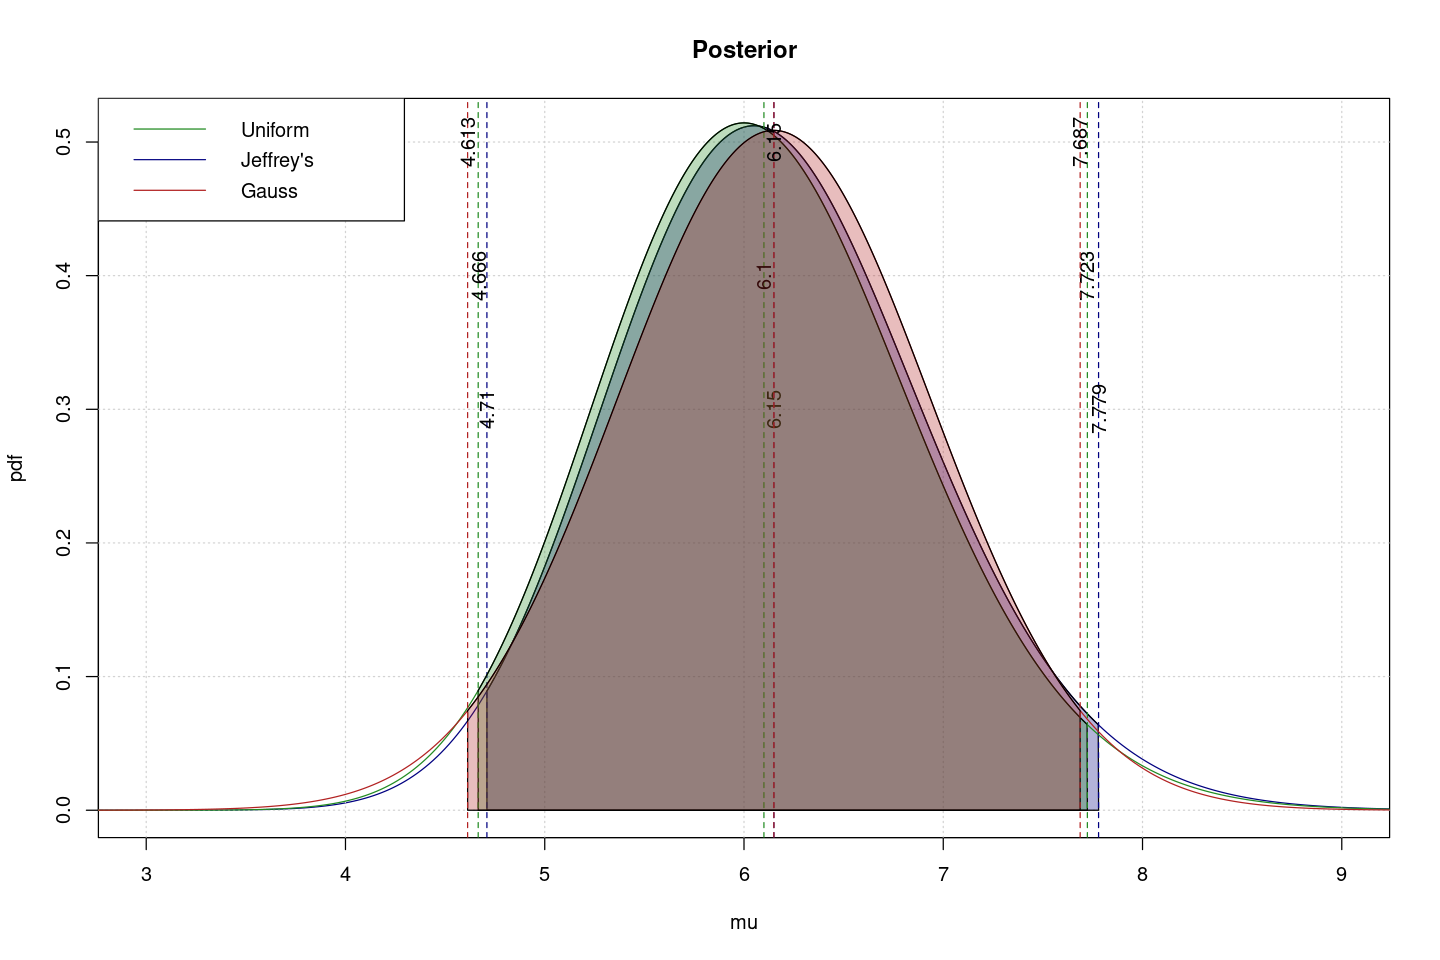

In [8]:
jcol = 'navy'
gcol = 'firebrick'

myplot(mu1,j.post(mu1),fillit = FALSE,title = 'Posterior',mycol = jcol,winw=12,winh=8,xrange=c(3,9),xlab='mu')
mypoly(j.post,j.left,j.right,mycol = jcol)
mytext(c(j.left,j.right,j.mean),posy=0.3,mycol=jcol)

mylines(mu1,u.post(mu1),mycol = ucol)
mypoly(u.post,u.left,u.right,mycol=ucol)
mytext(c(u.left,u.right,u.mean),posy=0.4,mycol=ucol)

mylines(mu1,gaub1(mu1),mycol = gcol)
mypoly(gaub1,g.left,g.right,mycol=gcol)
mytext(c(g.left,g.right,g.mean),posy=0.5,mycol=gcol)

legend('topleft', c('Uniform','Jeffrey\'s','Gauss'), col=c(ucol,jcol,gcol), lty=1, bty ='o')

The best estimate for the rate $\mu$ of the Poisson process is $\mu = 6.15$ with $[4.71,7.78]$ as the $95\%$ CI (with Jeffrey's prior).

# Exercise 2

A well established and diffused method for detecting a disease in blood fails to detect the presenceof disease in $15\%$ of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of $n=75$ patients known to have the disease is screened using the new method.

#### a)  what is the probability distribution of $y$, the number of times the new method fails to detect the disease ?

It is a binomial distribution. Each event has a finite set of (two) possible outcomes: 1. screening does not detect the illness, 2. screening succeeds. We will call 'p' the probability of outcome 1, and (1-p) that of outcome 2.

(Side note: A poissonian could represent something like the number of infected people in a week.) 

#### (b)  on the $n=75$ patients sample, the new method fails to detect the disease in $y=6$ cases. What is the frequentist estimator of the failure probability of the new method?

In the frequentist approach, the closest we can get to the true value of the parameter $p$ is through the unbiased estimator 

$$ p_F = y/n \qquad \text{and} \qquad Var(p_F) = \frac{p(1-p)}{n} $$

In [9]:
n = 75
y = 6
f.p = y/n
f.std = f.p*(1-f.p)/n 
cat('The probability of incorrectly screening the disease is p =',f.p,'+-',f.std,'\n')

The probability of incorrectly screening the disease is p = 0.08 +- 0.0009813333 


#### (c)  setup a bayesian computation of the posterior probability, assuming a $Beta$ distribution with mean value $\mu = 0.15$ and standard deviation $\sigma=0.14$. Plot the posterior distribution for $y$, and mark on the plot the mean value and variance

From the theory:

$$ \alpha = \biggl(\frac{\mu(1-\mu)}{\sigma^2} - 1\biggr)\mu $$
$$ \beta = \biggl(\frac{\mu(1-\mu)}{\sigma^2} - 1\biggr)(1-\mu) = \alpha(1/\mu -1) $$

We recall the usual formulas:
$$ \alpha_{post} = \alpha_{prior} + y \qquad \text{and}\qquad \beta_{post} = \beta_{prior} + n - y $$

$$ mean = \frac{\alpha}{\alpha + \beta} \qquad \text{and}\qquad mode = \frac{\alpha - 1}{ \alpha + \beta - 2}  $$

In [10]:
mean <- 0.15
std <- 0.14

#https://stats.stackexchange.com/questions/12232/calculating-the-parameters-of-a-beta-distribution-using-the-mean-and-variance
alpha.prior <- (((1-mean)/(std**2))-(1/mean))*mean**2
beta.prior <- alpha.prior*((1/mean)-1)

cat('prior stats',alpha.prior,beta.prior,'\n')

#usual formulas
alpha.post <- alpha.prior + y
beta.post <- beta.prior + n - y
post2 <- function(p) {dbeta(p,alpha.post,beta.post)}
mean.post <- alpha.post/(alpha.post + beta.post)
mode.post <- (alpha.post-1)/(alpha.post+beta.post-2)
std.post   <- sqrt(alpha.post*beta.post/((alpha.post+beta.post)^2*(alpha.post+beta.post+1)))

cat('post stats: alpha',alpha.post,'beta',beta.post, 'mean',mean.post,'mode',mode.post,'std',std.post,'\n')

prior stats 0.8257653 4.679337 
post stats: alpha 6.825765 beta 73.67934 mean 0.08478674 mode 0.07420875 std 0.03085551 


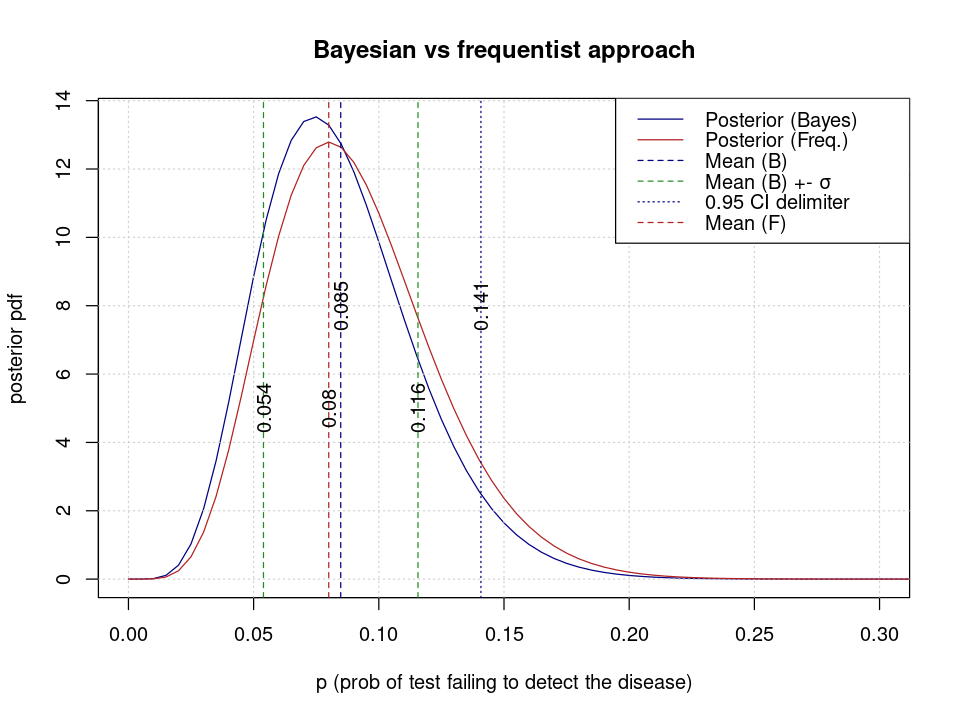

In [11]:
#plot
freqcol <- 'firebrick'
baycol <- 'navy'
N2 <- 201
p2 <- seq(0,1,length.out = N2)

post.dbinom <- dbinom(y,n,p2)*N2/sum(dbinom(y,n,p2))

myplot(p2,post2(p2)*N2/sum(post2(p2)),fillit=FALSE,mycol=baycol,type='l',xlab='p (prob of test failing to detect the disease)',ylab='posterior pdf',xrange = c(0,0.3),title='Bayesian vs frequentist approach')
mylines(p2,post.dbinom,mycol=freqcol)
mytext(f.p,mycol = freqcol)
mytext(c(mean.post-std.post, mean.post+std.post),mycol='forestgreen')
mytext(mean.post,posy=8,mycol=baycol)
mytext(qbeta(0.95,alpha.post,beta.post),posy=8,mycol=baycol,lt=3)
legend('topright',legend=c('Posterior (Bayes)','Posterior (Freq.)','Mean (B)','Mean (B) +- σ','0.95 CI delimiter','Mean (F)'),col=c(baycol,freqcol,baycol,'forestgreen',baycol,freqcol),lt=c(1,1,2,2,3,2))

#### (d)  Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than $15\%$, the new test is no better that the traditional method.  Test the sample at a $5\%$ level of significance in the Bayesian way.

The Bayesian hypothesis test is performed by integrating the posterior pdf up to the $1-\alpha$ percentile. If that value is smaller than $0.15$ (it is in fact 0.141), we accept the null hypothesis with a $\alpha$ significance.

#### (e)  Perform the same hypothesis test in the classical frequentist way.
For the frequentist approach, in order to approve the new test I need to get the probability (from the cumulative binomial distribution) that the test fails at most $y$ times to be less than $\alpha$. That is not the case, and the new test is not approved in the frequentist approach.

In [12]:
alpha <- 0.05
p <- 0.15
test <- integrate(post2, lower=p, upper=1)[[1]]
cat("Bayesian approach: \n The new method is", 
    ifelse(test<alpha, "", " not "), 
    "better than the traditional method;",
    'test result =', test,
    "\n")

h0 <- function(y) {pbinom(y, size=n, prob=p)}

pvalue <- h0(y)
cat('Frequentist approach: \n The new method is', 
    ifelse(pvalue<alpha, '', ' not '), 
    'better than the traditional method ',
    '(pvalue =', pvalue,
    '\n',sep='')

Bayesian approach: 
 The new method is  better than the traditional method; test result = 0.03127933 
Frequentist approach: 
 The new method is not better than the traditional method (pvalue =0.0543533


# Exercise 3: The lighthouse
Given the problem of the lightouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

The only difference is the fact that the parameter $\beta$ is not fixed. Thus, the analytical form of the likelihood remains unchanged, while the prior changes.
In this case, given that and are independent from each other we take a uniform prior for both of them. The analytical form is a Cauchy function. 


![Schematization of the problem.](Lighthouse.png)

In [13]:
data_generator2 <- function(n.flashes, a.true, b.true, limits){
    
    # Note: out of n.flashes flashes emitted by the lighthouse, 
    # on average only half will be directed towards the shore.
    epsilon = 0.1
    light.thetas <- (runif(n.flashes,-pi/2+epsilon,pi/2-epsilon))     #Emission angles in [-pi/2,pi/2]
    x.obs <- b.true*tan(light.thetas) + a.true     #Calculate arrival positions
    #x.obs <- x.obs[which(x.obs>limits[1] & x.obs<limits[2])]
}

logCauchy <- function(a,b,obs) {
    logL <- 0.0
    for (x in obs) {
        logL <- logL + log(b/(b^2 + (x-a)^2))
    }
    return (logL)
}
xt <- c(1,2,3)

#True vals
set.seed(2097126)
a.true = 0.6
b.true = 2.8


# Plot unnormalized 2D posterior as contours .
point.contour <- function(A,B,L,xdata,topAB) {
    cols <- hcl.colors(10, 'inferno') #"YlOrRd"
    contour (A, B, L,
    nlevels = 10,
    labcex = 1,
    method = 'edge',
    lwd = 2,
    xlab=expression(alpha),
    ylab=expression(beta),
    main = paste(length(xdata),'flashes'),
    col = cols)
    grid()
    points(xdata,y=rep(1,length(xdata)),col='#00bfff')
    legend('topleft',legend=c('Likelihood',paste('flashes mean =',round(mean(xdata),3)),paste('true α = ',a.true,',true β =',b.true))
                              ,col=c('red','#00bfff','white'),lty=1)
    abline(v=topAB[1],lty=2,col='black')
    abline(h=topAB[2],lty=2,col='black')
    text(x=topAB[1],y=1,col='black',label=topAB[1])
    text(x=-1,y=topAB[2],col='black',label=topAB[2])
    abline(v=mean(xdata),lty=2,col='#00bfff')
}

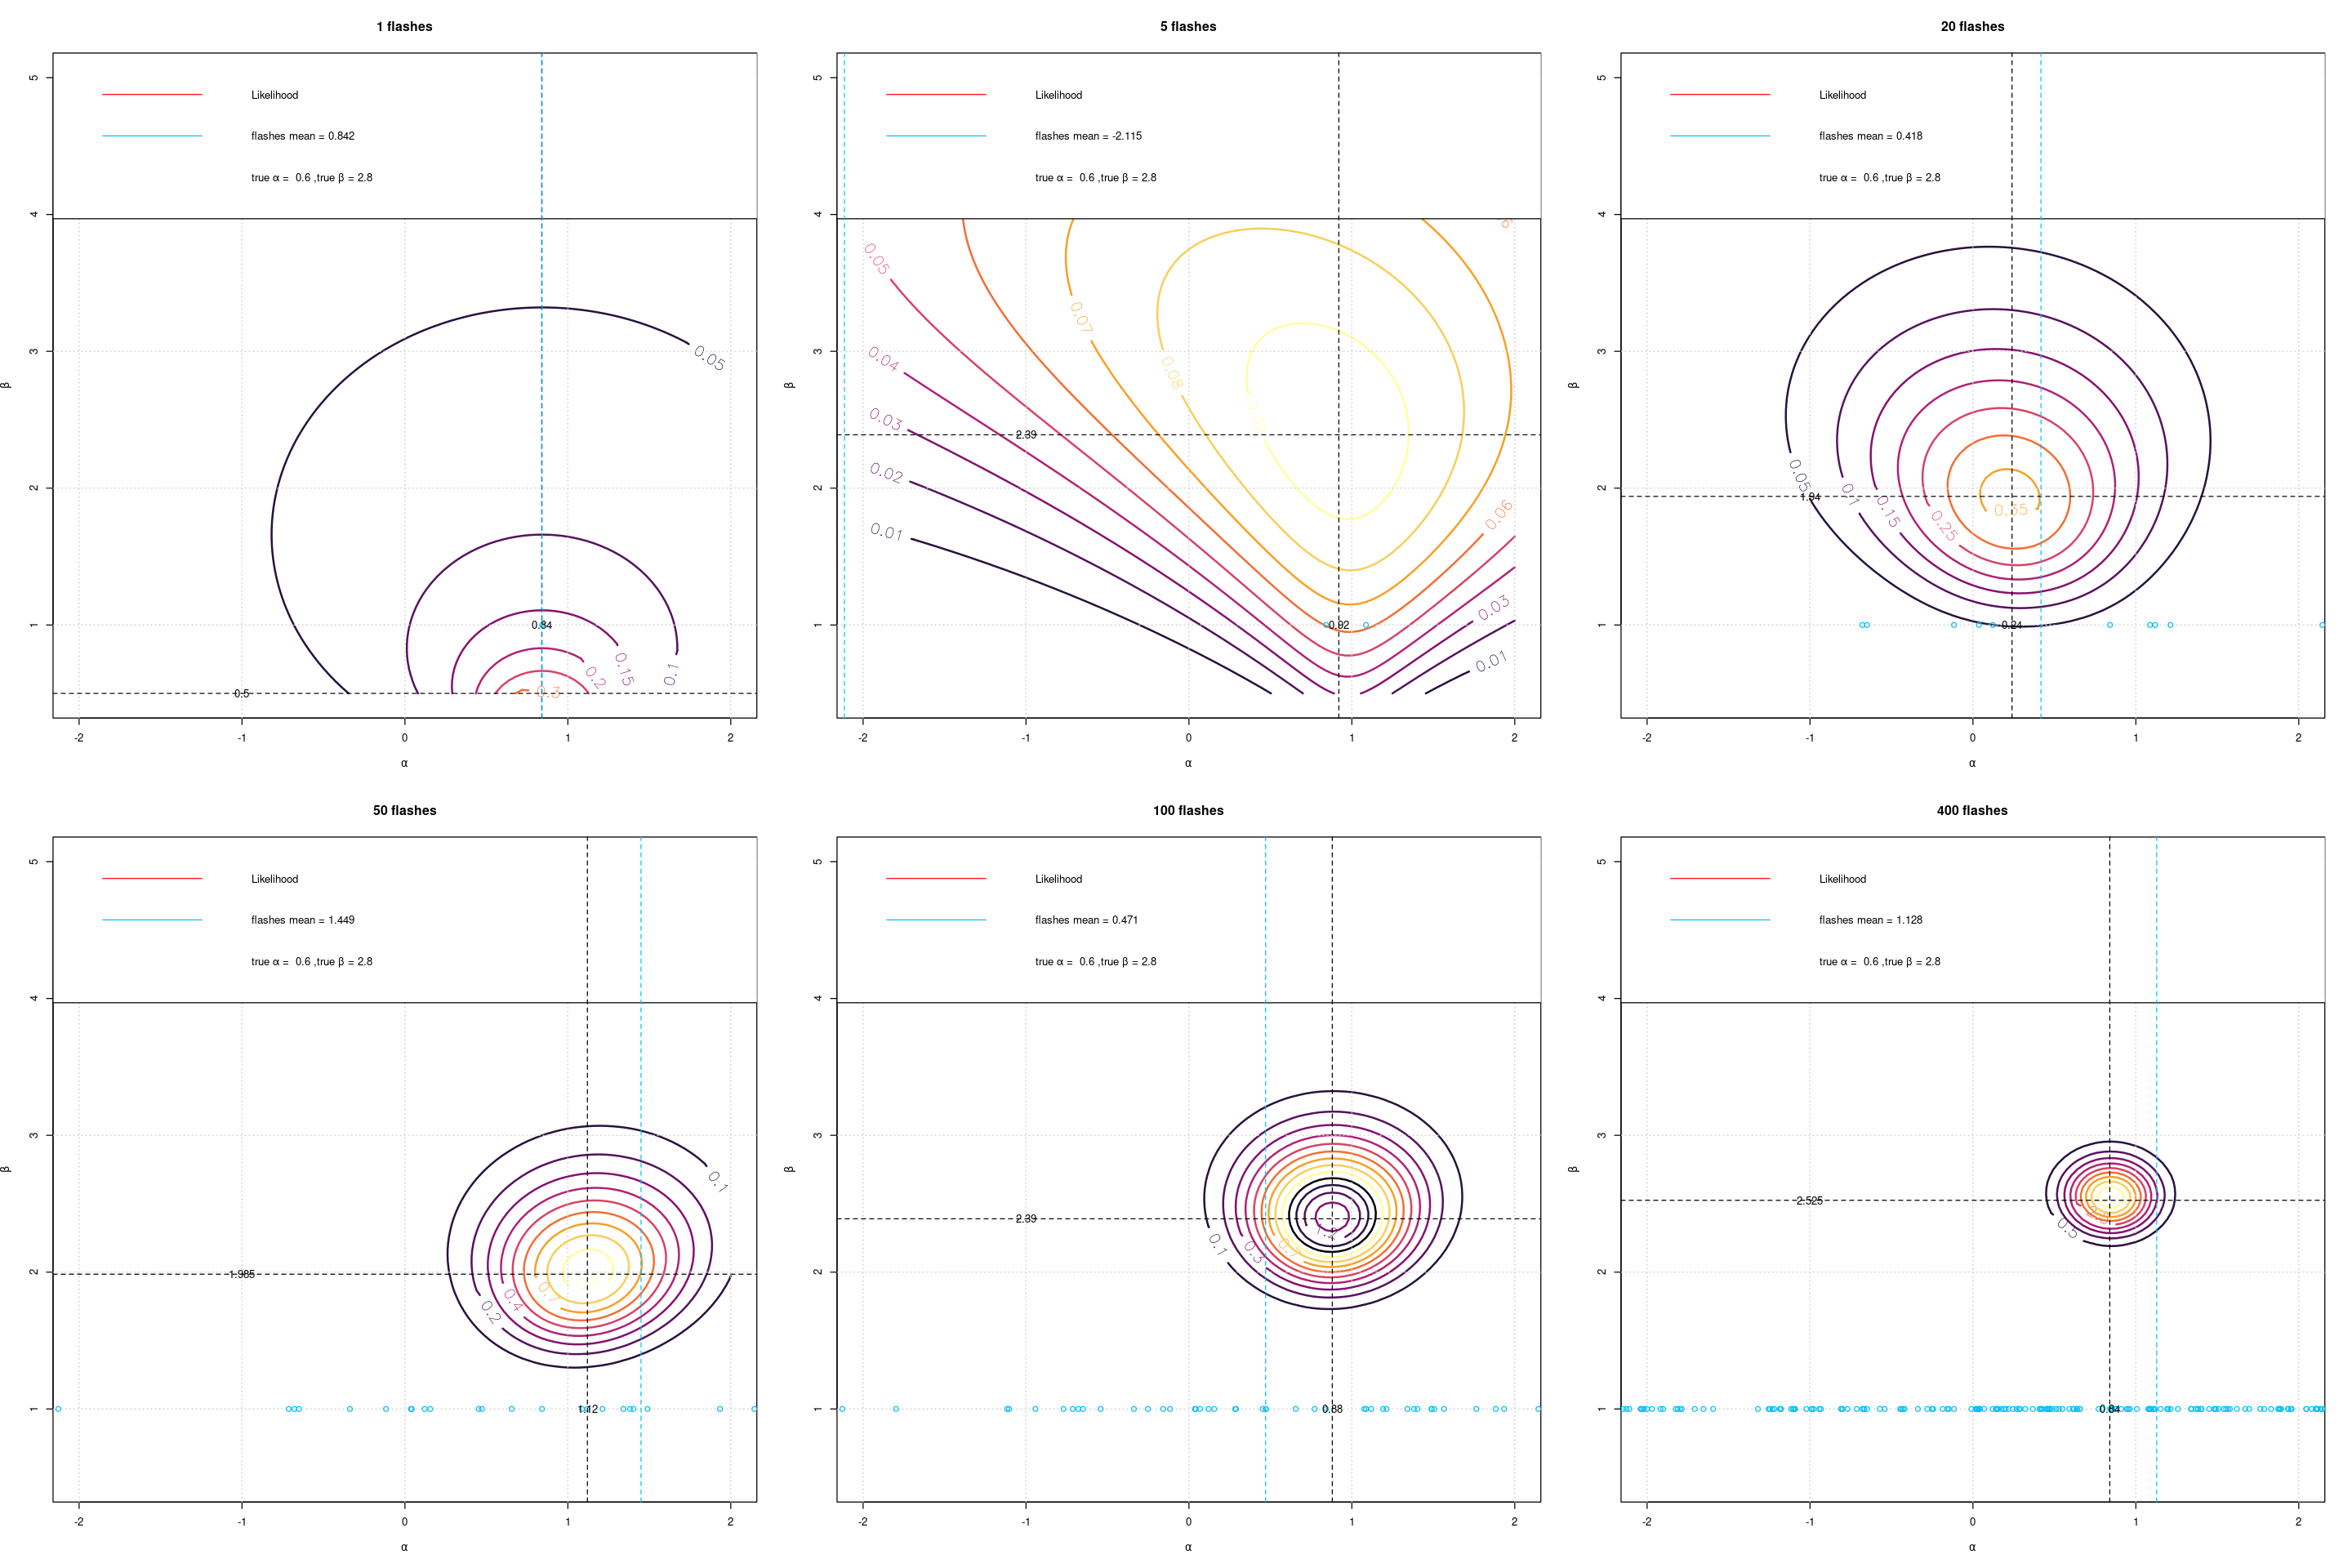

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
n.obs.list = c(1,5,20,50,100,400)

#Prior distributions
a.min = -2
a.max = 2
len.a = 101
da = (a.max-a.min)/len.a
A = seq(a.min,a.max,len=len.a)
b.min = 0.5
b.max = 5
len.b = 101
db = (b.max-b.min)/len.b
B = seq(b.min,b.max,len=len.b)

a.prior = 1/(a.max-a.min)
b.prior = 1/(b.max-b.min)

#Loop over n.obs
best.est.list <- vector()

x.origi =  data_generator2(max(n.obs.list), a.true, b.true,c(a.min,a.max)) #data_generator(2*n.obs, a.true, b.true)#

par(mfrow=c(2,3))
options(repr.plot.width=24, repr.plot.height=16)
for (n.obs in n.obs.list){

    x.obs =  x.origi[1:n.obs] # data_generator2(n.obs, a.true, b.true) # 
    L.matrix <- vector()
    
    #Update matrix of log posteriors
    for (a in A){
        for (b in B){
            L = sum(log(dcauchy(x.obs,a,b))) #sum(logCauchy(a,b,x.obs))  # 
            L.matrix <- cbind(L.matrix,L)
        }
    }
    
    #From L to Posterior (on the grid)
    L.matrix <- matrix(L.matrix, nrow = len.a, byrow = TRUE)
    maxL = max(L.matrix)
    max.idx = which(L.matrix == maxL, arr.ind = TRUE)
    topAB <- c(A[max.idx[1]],B[max.idx[2]])
    
    #Log-Sum-Exp trick
    post.matrix <- L.matrix#/(sum(L.matrix)*da*db) where L -> exp(L)
    therest <- log(sum(exp(post.matrix - maxL)))
    post.matrix <- exp( L.matrix - maxL - log(da) - log(db) - therest )      


    #cat('flashes mean =',round(mean(x.obs),3),'\n')
    point.contour(A,B,post.matrix,x.obs,topAB)
}

I also plotted the recorded data ``x.flashes`` along the x-axis since they share it with $\alpha$. From a heuristic point of view, I should expect ``mean(x.flashes)`` to be aligned with the most likely value of $\alpha$, but this is rarely true since the mean is extremely sensitive to outliers. These outliers are not uncommon since we assumed a flat prior in $\theta$, meaning that an angle of $85^{\circ}$ is projected to $x=11$(!) just with $\beta=1, \alpha=0$. Nevertheless, the max-likelihood approach can predict $\alpha$ and $\beta$ with as few as $100$ data points. In order to have ``mean(x.flashes)`` catch up, we could increase the number of data points, but this gives problems when exponentiating ``logL``. So I implemented the 'Log-Sum-Exp trick' to better compute the normalized likelihood (it tooks the difference of the logarithms before exponentiating to prevent underflow).

# Exercise 4: Signal over background

Given a set of counts ${N_k}$ measured at values {x_k}, we want the best estimate of the amplitude of the signal peak and of the background staying below.

$$(1) \qquad S_k = \Delta t \Biggl[ A   exp\Biggl( - \frac{(x_k-x_0)^2}{2w^2} \Biggr) + B\Biggr] $$

We assume $x_0, w, \Delta t$ are known. 

Our problem is the finitess of our dataset, which follows a poissoninan distribution of rate $S_k$ (it is not smooth as the signal, unless we wait an infinite amount of time):

$$(2) \qquad P(N|S_k) = \frac{S_k^N e^{-S_k}}{N!} $$

The likelihood of the posterior for $A, B$ is

$$ (3)\qquad L = log P(A,B|D,M) = const + \Sigma [N_klogS_k-S_k]$$

Given the Signal over Background example discussed last week (slides ``Statistical models and inference - part II``, from which some code is taken), analyze and discuss the following cases:

#### (a)  vary the sampling resolution $samp.res$ used to generate the data, keeping the same sampling range

``xdat <- seq(from=-7*w, to=7*w, by=0.5*w)`` 

•change the resolution $w=\{0.1,0.25,1,2,3\}$
•Check the effect on the results

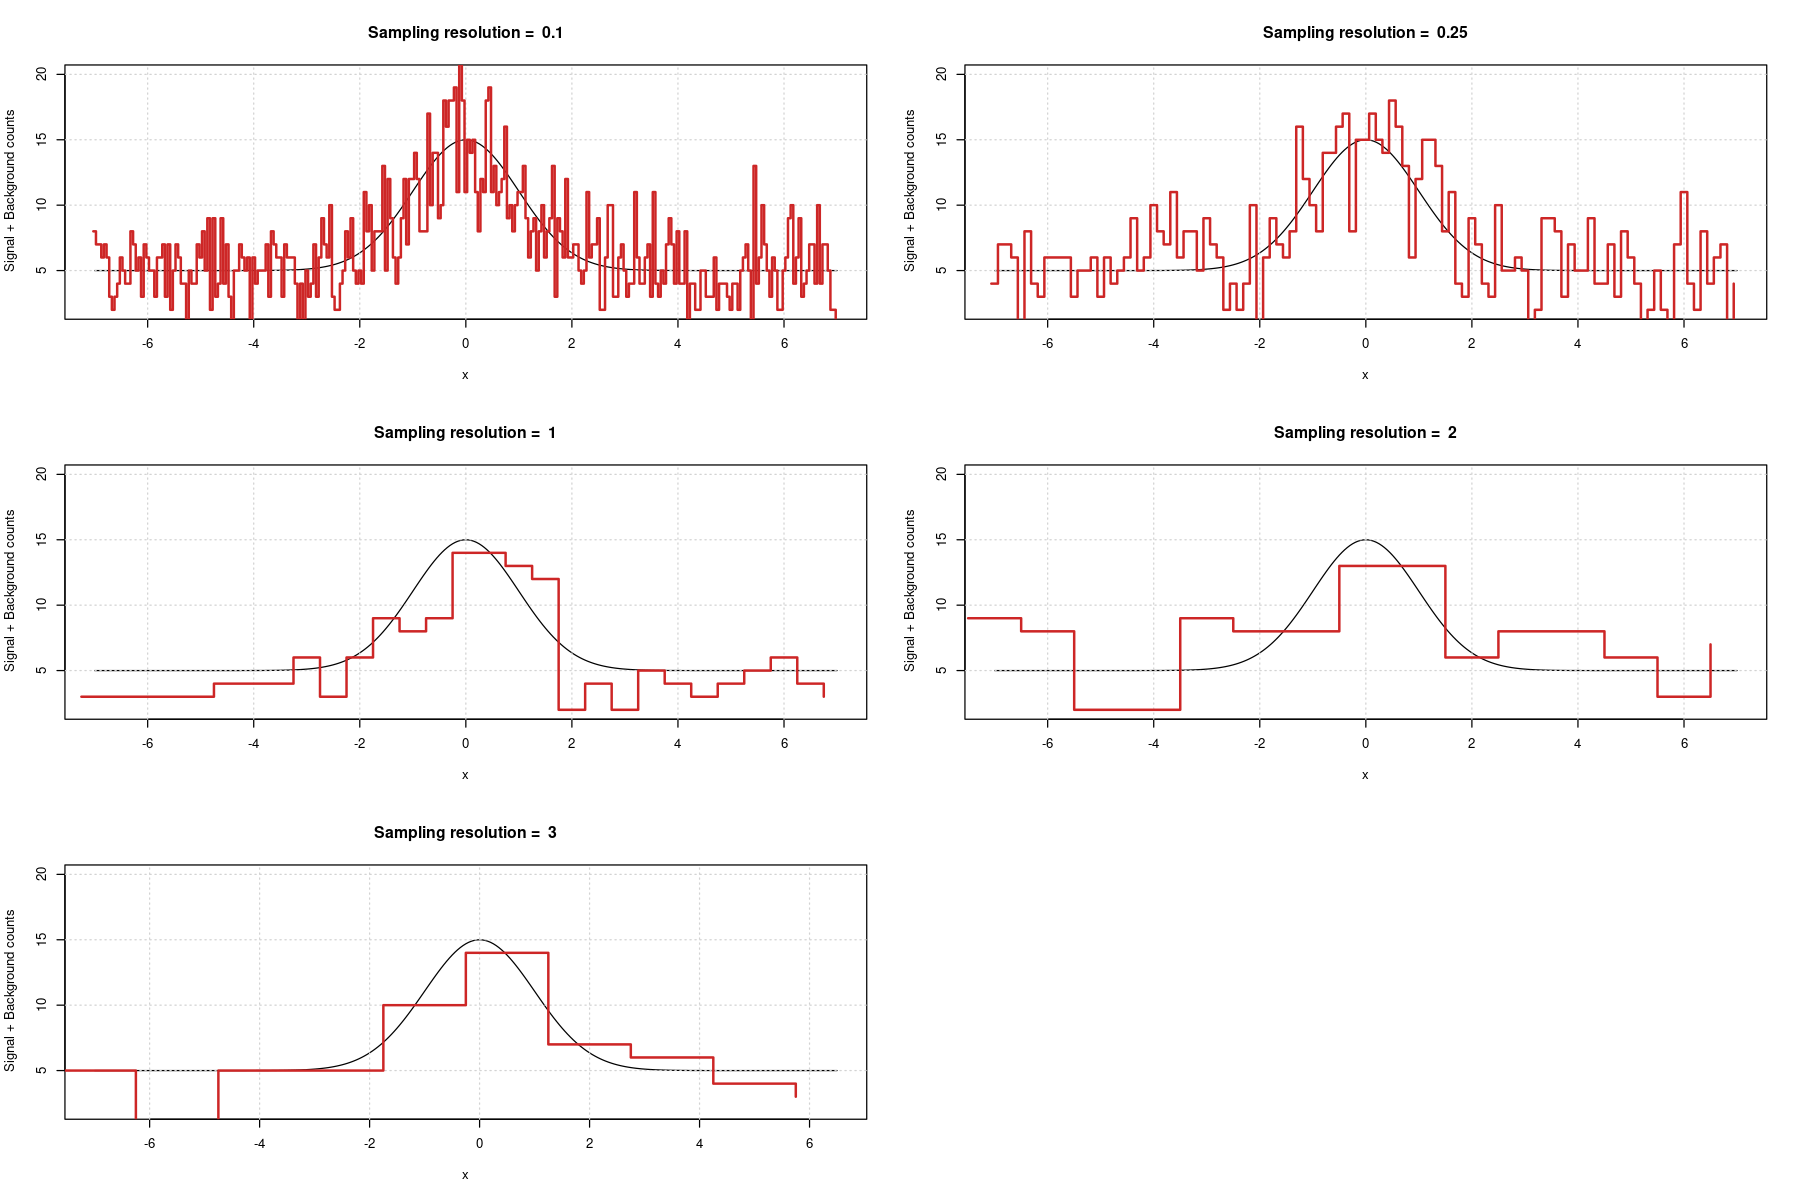

In [15]:
#Signal
signal <- function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Log posterior
log.post <- function (d, x, a, b, x0, w, t) {
if(a<0 || b <0) { return (-Inf )} # the effect of the prior
sum( dpois(d, lambda = signal (x, a, b, x0, w, t), log=TRUE ))
}

# Define model parameters
x0 <- 0         # Signal peak
w <-1           # Signal width
A.true <- 2    # Signal amplitude
B.true <- 1    # Background amplitude
Delta.t <- 5   # Exposure time
resolutions <- c(0.1, 0.25, 1, 2, 3)

# - Generate the observed data
par(mfrow=c(3,2))
options(repr.plot.width=15, repr.plot.height=10)

As <- A.true
Bs <- B.true


for (r in resolutions) {
        xdat <- seq(from=-7, to=7, by=0.5*r) #xdat = signals
        s.true <- signal (xdat , As , Bs , x0, w, Delta.t)#equation 2
        ddat <- rpois( length(s.true), s.true)#generate data with S prob

        xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) #theoretical signal
        splot <- signal(xplot , As , Bs, x0, w, Delta.t)
        plot(xplot , type='l',splot ,main=paste('Sampling resolution = ',r), ylim = c(2,20),
        xlab="x", ylab=" Signal + Background counts")
        grid()
        xdat.off <- xdat -0.25*r #to ~center bins
        lines(xdat.off , ddat , type='s',col='firebrick3',
        lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
}

In [16]:
# - Sampling grid for computing posterior
Nsamp <- 201
a <- seq(0.0, 4.0, length.out=Nsamp)
b <- seq(0.5, 1.5, length.out=Nsamp)

da <- (max(a)-min(a))/Nsamp
db <- (max(b)-min(b))/Nsamp


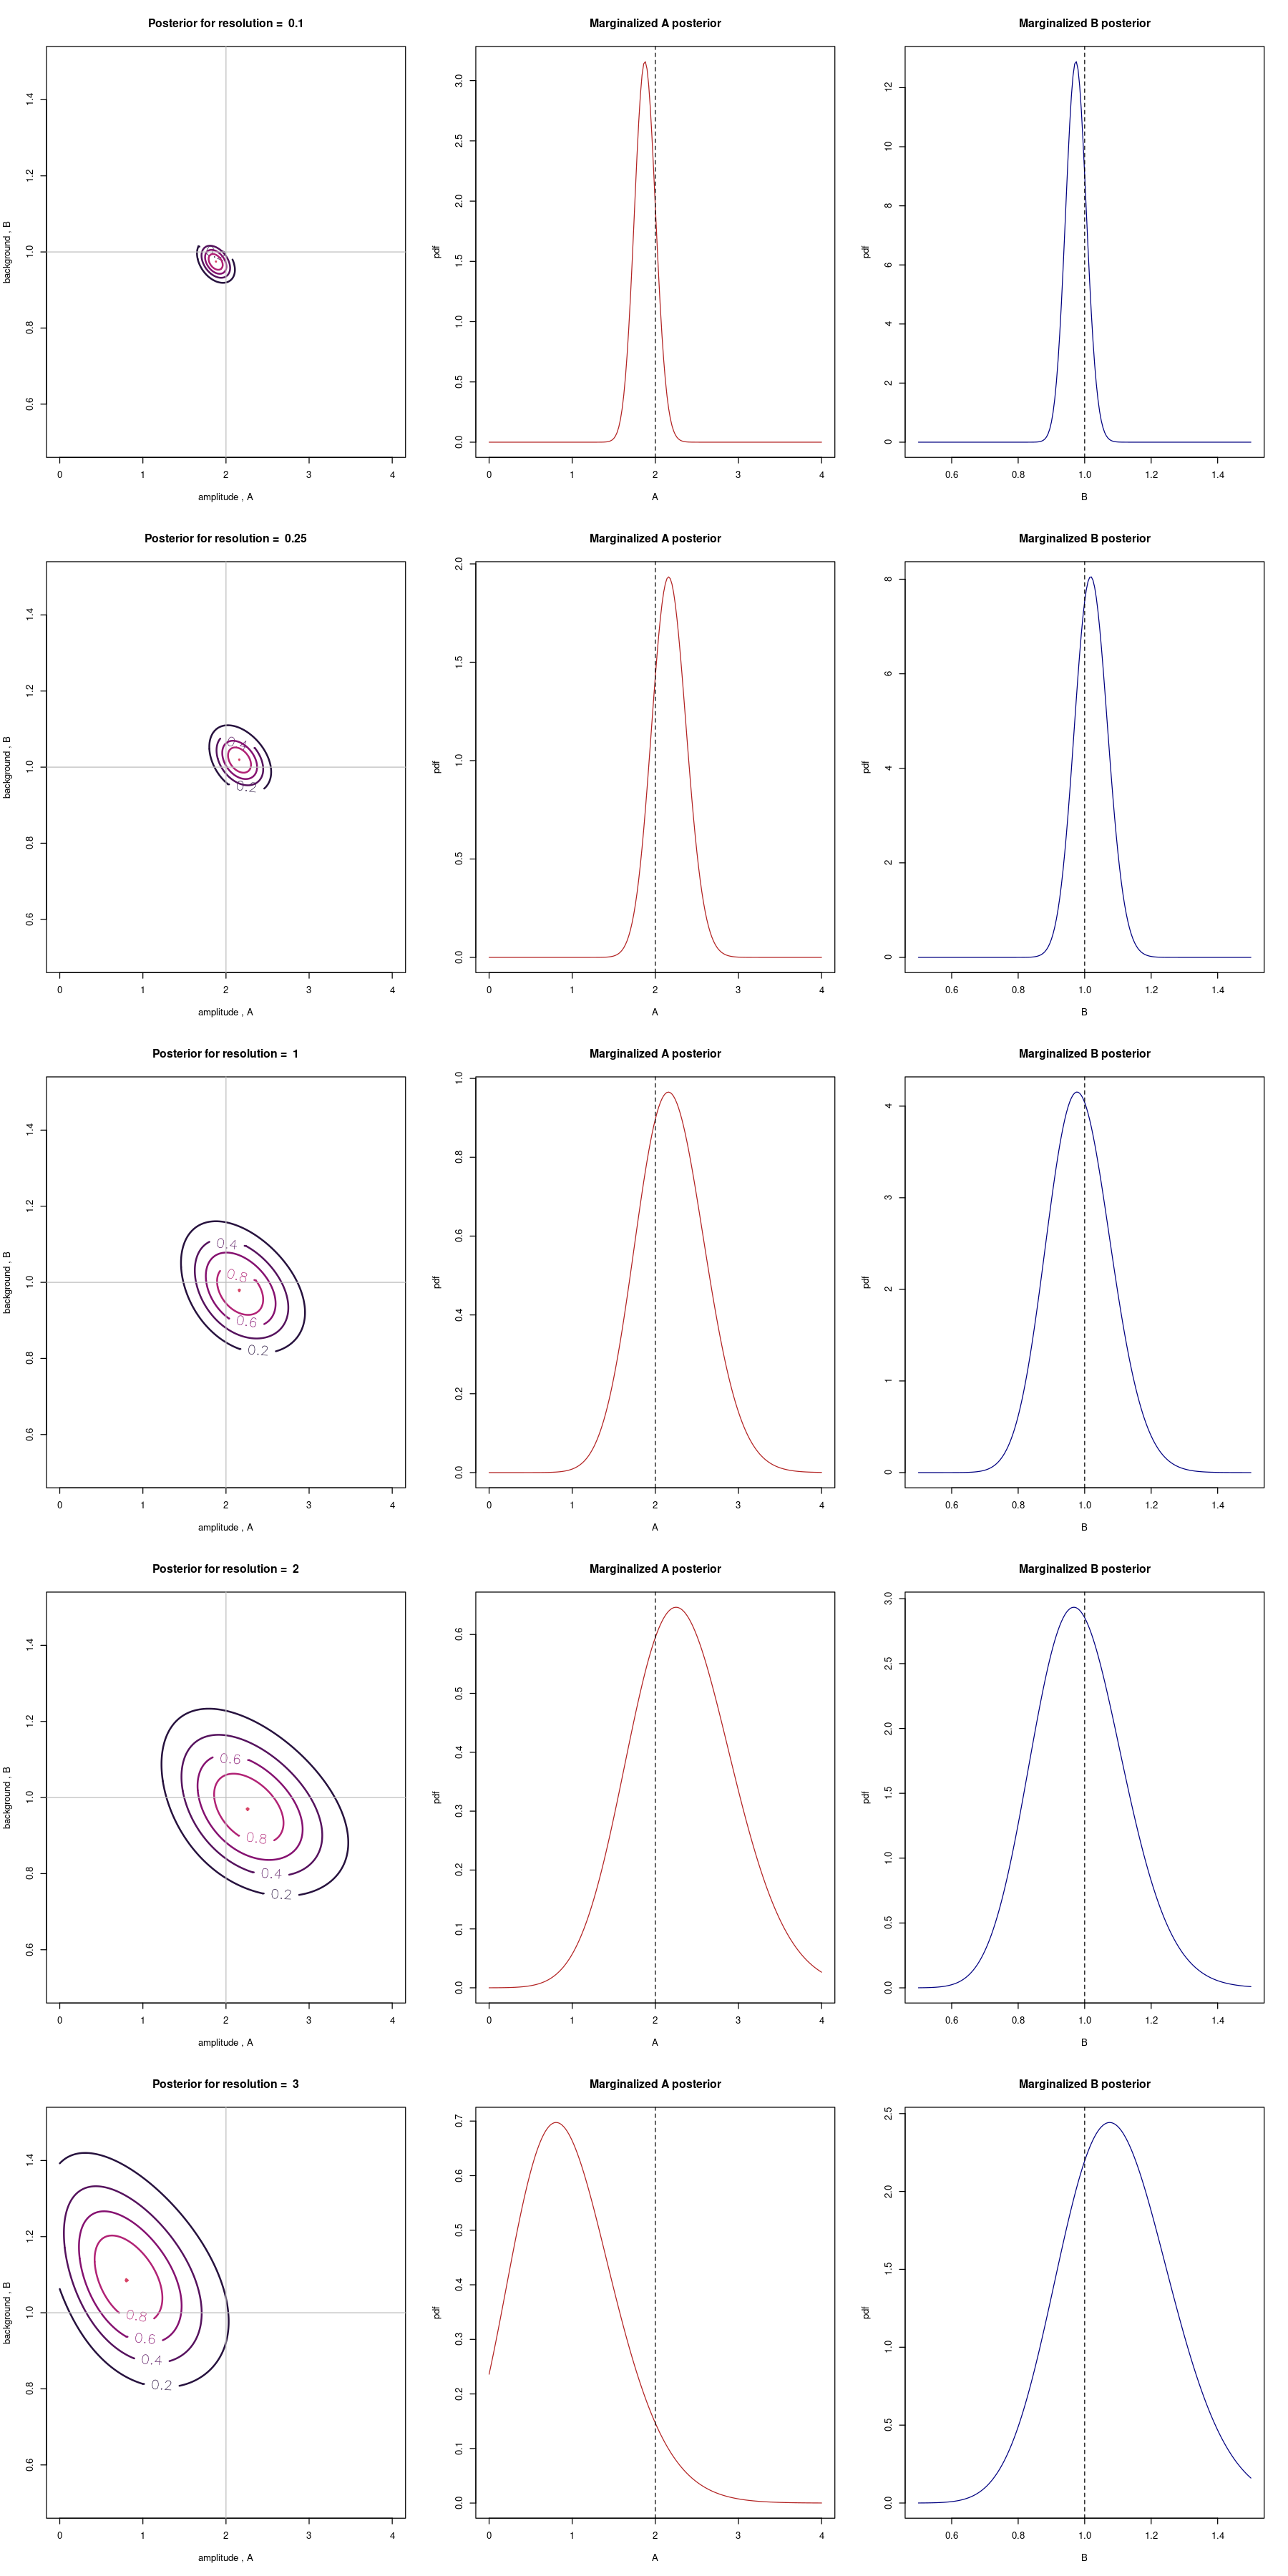

In [17]:
# Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid

par(mfrow=c(5,3))
options(repr.plot.width=15, repr.plot.height=30)

for (r in resolutions){
        xdat <- seq(from=-7, to=7, by=0.5*r)
        s.true <- signal (xdat , As , Bs , x0, w, Delta.t)
        ddat <- rpois(length(s.true), s.true)
    
        z <- matrix(data=NA , nrow= length(a), ncol= length(b))
        for(j in 1:length(a)) {
            for(k in 1:length(b)) {
                z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
            }
        }
    
    cols = hcl.colors(10, 'inferno') #"YlOrRd"
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour (a, b, exp(z),
    nlevels = 5,
    col = cols,  
    labcex = 1,
    lwd = 2,
    main = paste('Posterior for resolution = ',r),
    xlab="amplitude , A",
    ylab="background , B")
    abline (v=2,h=1,col="grey")
    
    #marginalized A posterior
    z.a    <- apply(exp(z), 1, sum)
    z.a.n  <- z.a/(da*sum(z.a))
    plot(a,z.a.n,main='Marginalized A posterior',type='l',xlab='A',ylab='pdf',col='firebrick')
    abline(v=As,lty=2,col='black')

    
    #marginalized B posterior
    z.b    <- apply(exp(z), 2, sum)
    z.b.n  <- z.b/(db*sum(z.b))
    plot(b,z.b.n,main='Marginalized B posterior',type='l',xlab='B',ylab='pdf',col='navy')
    abline(v=Bs,lty=2,col='black')

}

So the result of this first part is that if we increase our resolution from $3$ to $0.1$, we can see a clearer signal. This is what we expected.

#### (b)  change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
•Check the effect on the results

I will keep $B$ constant and change $A$. $r = 0.25$.

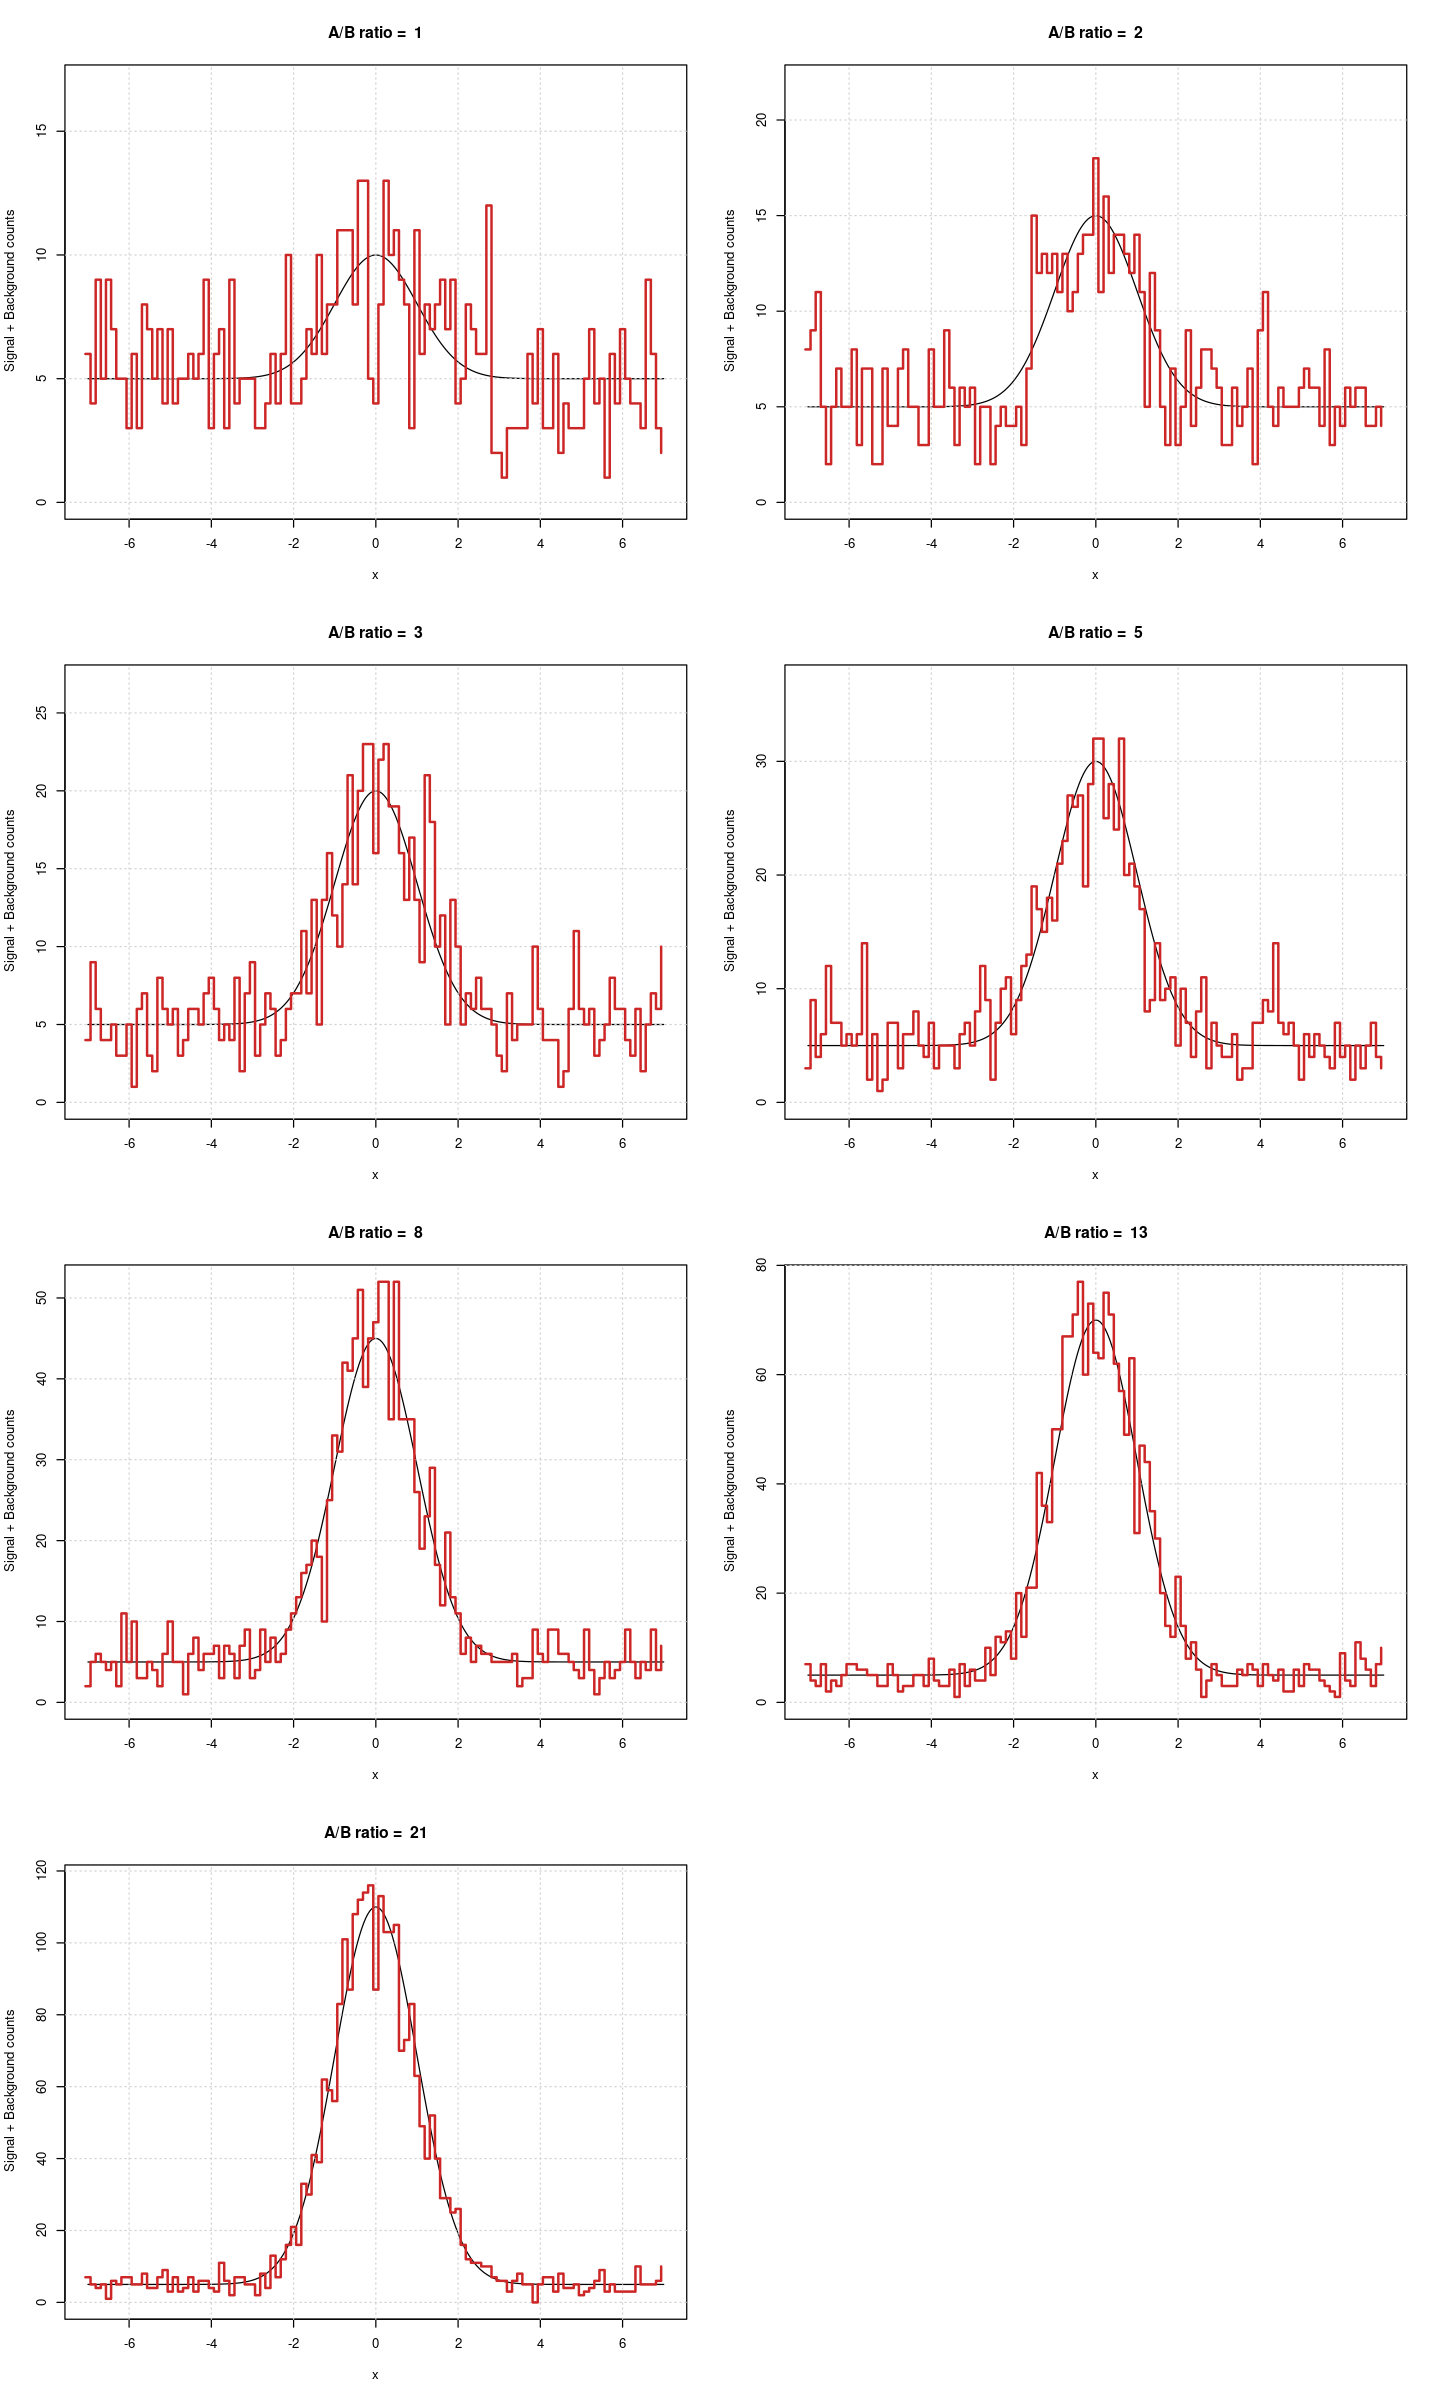

In [18]:
par(mfrow=c(4,2))
options(repr.plot.width=12, repr.plot.height=20)

A.trues <- c(1,2,3,5,8,13,21)
r <- 0.25

for (As in A.trues) {
#    for (Bs in B.true){
        xdat <- seq(from=-7, to=7, by=0.5*r) #xdat = signals
        s.true <- signal (xdat , As , Bs , x0, w, Delta.t)#equation 2
        ddat <- rpois( length(s.true), s.true)#generate data with S prob

        xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) #theoretical signal
        splot <- signal(xplot , As , Bs, x0, w, Delta.t)
        plot(xplot , type='l',splot ,main=paste('A/B ratio = ',As/Bs), ylim = c(0,12+5*As),
        xlab="x", ylab=" Signal + Background counts")
        grid()
        xdat.off <- xdat -0.25*r #to ~center bins
        lines(xdat.off , ddat , type='s',col='firebrick3',
        lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
#    }
}

In [19]:
# - Sampling grid for computing posterior
Nsamp <- 201

b <- seq(0.5, 1.5, length.out=Nsamp)
db <- (max(b)-min(b))/Nsamp

[1] 5.1 4.1 4.1 2.1

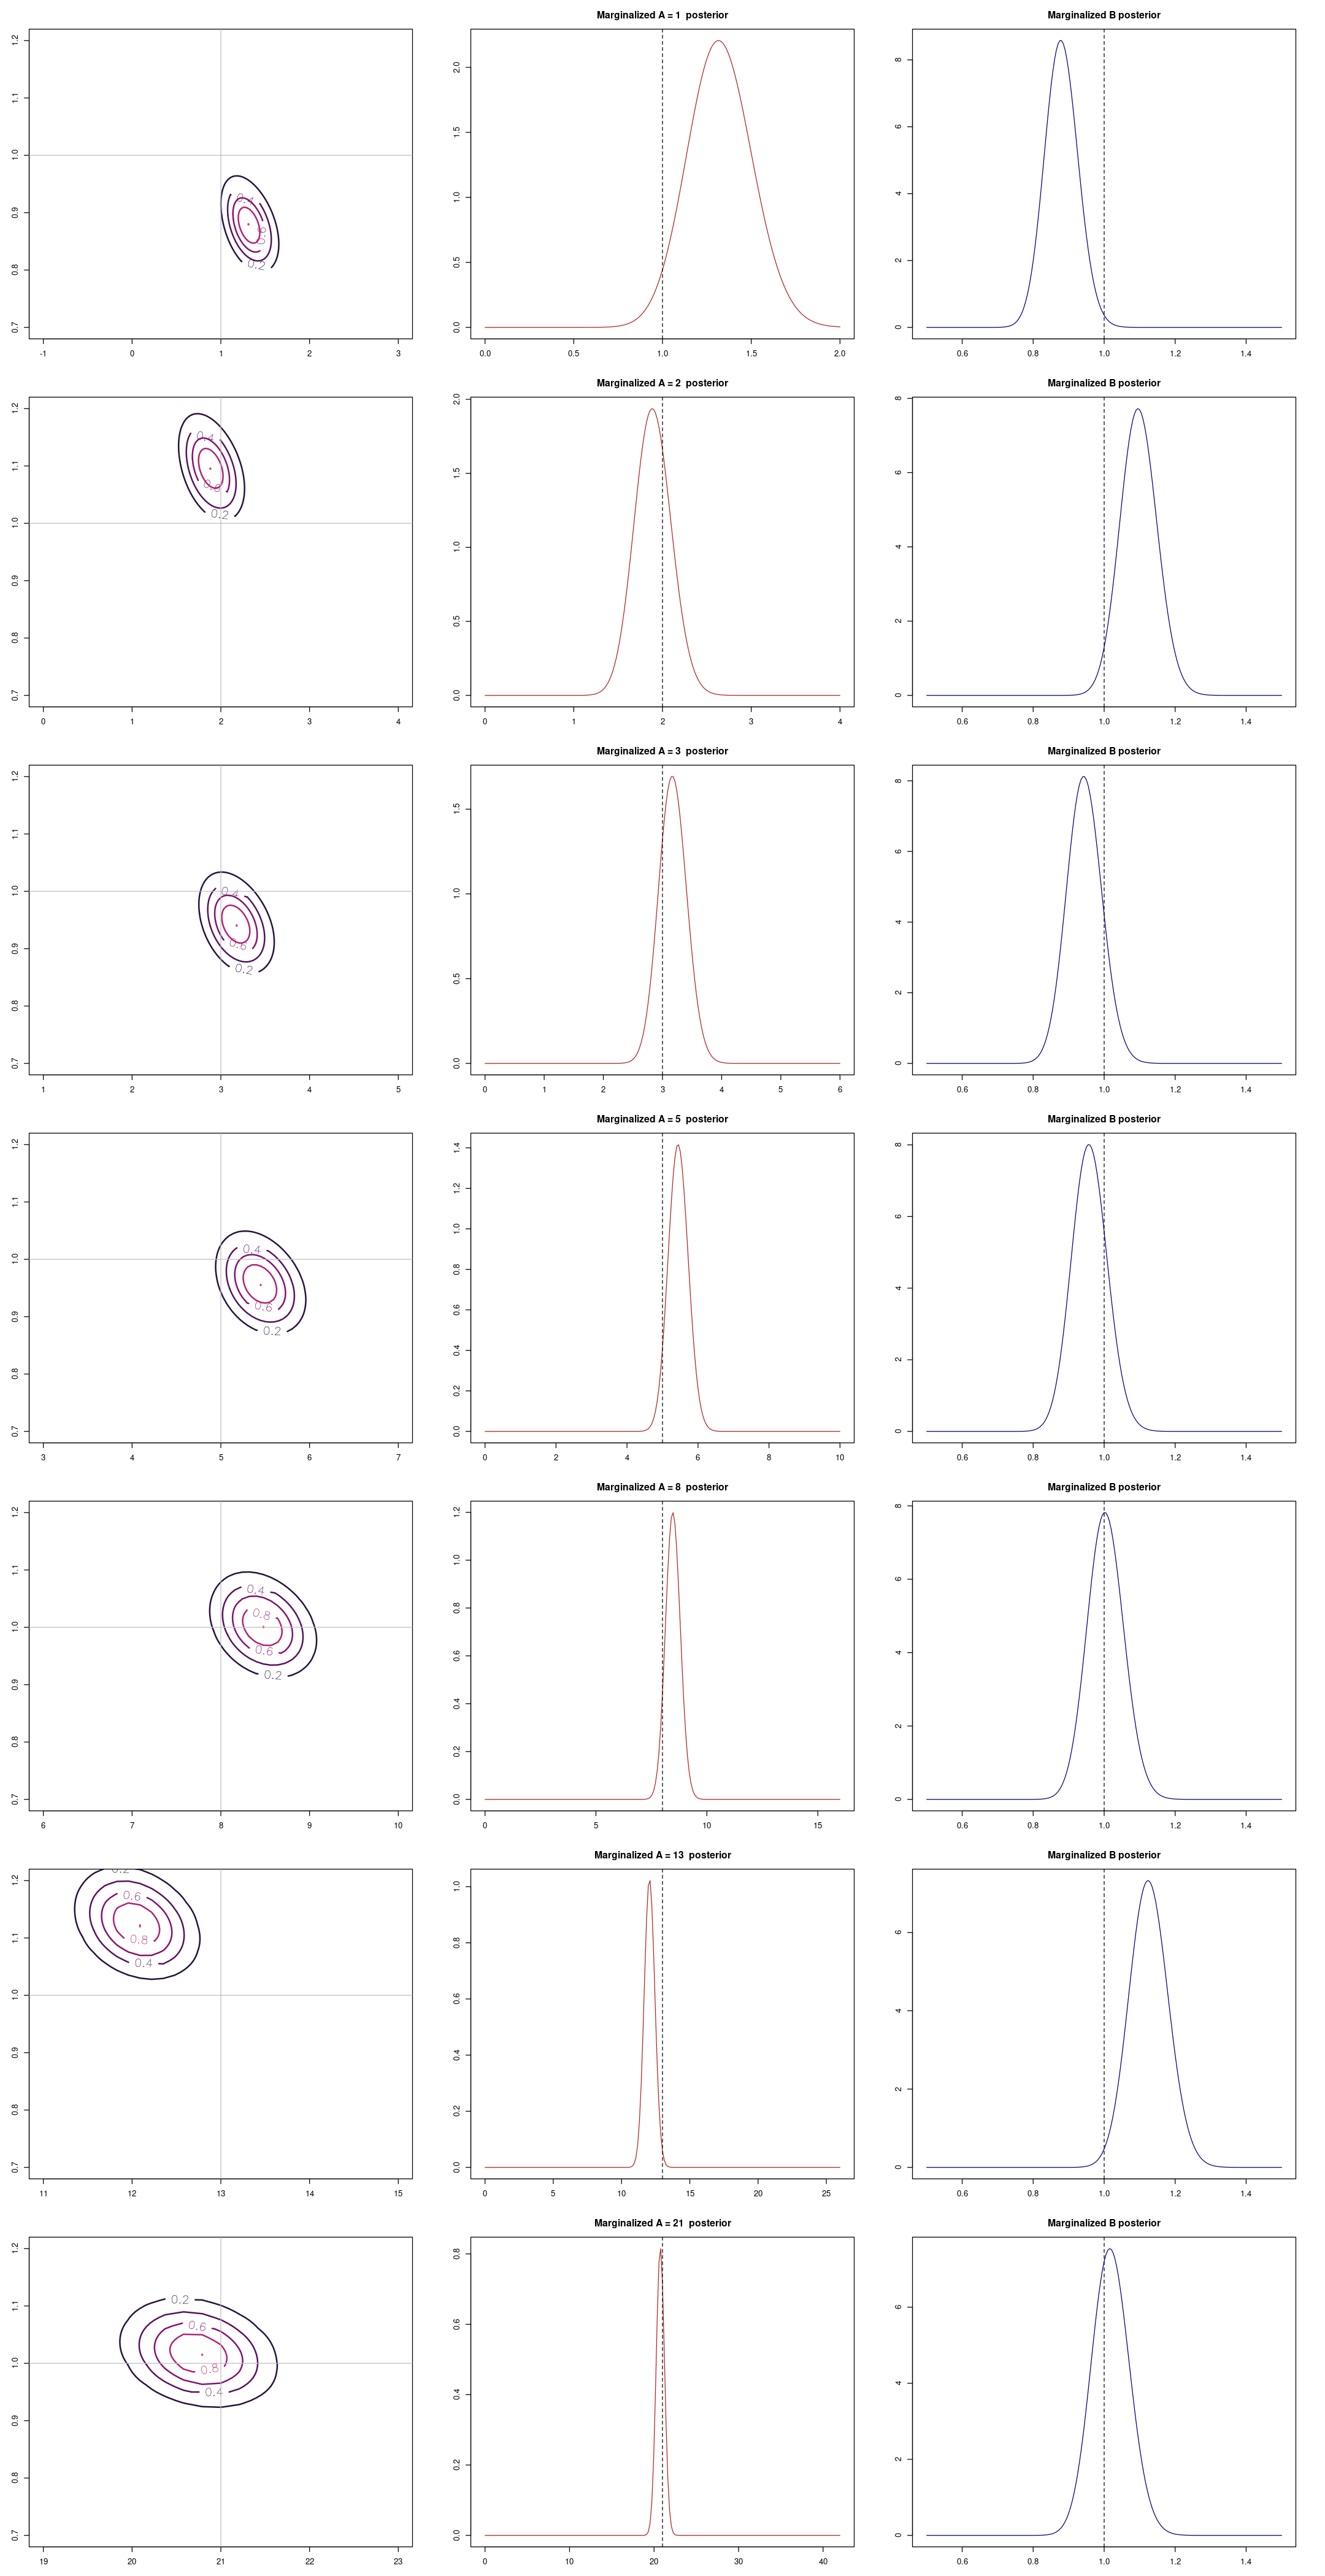

In [20]:
par("mar")
par(mar=rep(3,4))
par(mfrow=c(7,3))
options(repr.plot.width=18, repr.plot.height=35)

for (As in A.trues){
    a <- seq(0.0, 2*As, length.out=Nsamp)
    da <- (max(a)-min(a))/Nsamp
    
    xdat <- seq(from=-7, to=7, by=0.5*r)
    s.true <- signal(xdat, As, Bs , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior , z = ln P*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }
    cols = hcl.colors(10, 'inferno') #"YlOrRd"
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours .
    contour (a, b, exp(z),
    nlevels = 5,
    col = cols,  
    labcex = 1,
    lwd = 2,
    xlim = c(As-2,As+2),
     ylim = c(0.7,1.2),
    xlab="amplitude , A",
    ylab="background , B")
    abline (v=As,h=1,col="grey")
    
    #marginalized A posterior
    z.a    <- apply(exp(z), 1, sum)
    z.a.n  <- z.a/(da*sum(z.a))
    plot(a,z.a.n,main=paste('Marginalized A =',As,' posterior'),type='l',xlab='A',ylab='pdf',col='firebrick')
    abline(v=As,lty=2,col='black')
    
    #marginalized B posterior
    z.b    <- apply(exp(z), 2, sum)
    z.b.n  <- z.b/(db*sum(z.b))
    plot(b,z.b.n,main='Marginalized B posterior',type='l',xlab='B',ylab='pdf',col='navy')
    abline(v=Bs,lty=2,col='black')

}

The marginalized A posterior graphs confirm what we expected: as the ratio $A/B$ gets sharper, it is easier to recognize the signal.